# Setings

Bibliotecas usadas:

- datetime
- pandas
- matplotlib

- sys
- json
- glob

- webvtt

Outros:

- Youtube API (https://developers.google.com/youtube/v3)
- Youtube-dl (https://youtube-dl.org/)

## Configurações básicas 

- Bibliotecas usadas
- Diretórios e locais de trabalho


In [1]:
# Bibliotecas usadas

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
import datetime
import json
import glob

from moviepy.editor import *
from PIL import Image

In [12]:
# Diretórios e locais de trabalho
os.chdir("/Users/dumoura/Dev/PDev/Mashup_Vid_Processing/notebook/")
cwd = os.getcwd()
print(cwd)

/Users/dumoura/Dev/PDev/Mashup_Vid_Processing/notebook


In [13]:
#Base_dir
BASE_DIR = os.path.dirname(cwd) # base de trabalho
DATA_DIR = os.path.join(BASE_DIR, "data") # dados gerais levantados durante projeto
META_DIR = os.path.join(BASE_DIR, "metadados") #metadados levantados durante projeto
SAMPLE_DIR = os.path.join(DATA_DIR, "sample") # material em processo - pode ser apagado ao final, caso julgue necessário
INPUTS_DIR = os.path.join(SAMPLE_DIR, "inputs") # local de trabalho para processamento de dados de midia 
OUTPUTS_DIR = os.path.join(SAMPLE_DIR, "outputs") # local de trabalho para processamento de dados de midia 

#MASHUPS
VIDS_DIR = os.path.join(DATA_DIR, "vids") # dados gerais levantados durante projeto

#Inputs
VID_DIR = os.path.join(INPUTS_DIR, "vid_input") # local de trabalho para processamento de dados de midia 
AUDIO_DIR = os.path.join(INPUTS_DIR, "audio_input") # local de trabalho para processamento de dados de midia # # Criar diretórios e locais de trabalho
LGG_DIR = os.path.join(INPUTS_DIR, "lgg_input") # local de trabalho para processamento de dados de midia 

#Outputs
FRAME_DIR = os.path.join(OUTPUTS_DIR, "thumbnails") # local de trabalho para processamento de dados de midia 
SONG_DIR = os.path.join(OUTPUTS_DIR, "songs") # local de trabalho para processamento de dados de midia # # Criar diretórios e locais de trabalho
LYRIC_DIR = os.path.join(OUTPUTS_DIR, "lyrics") # local de trabalho para processamento de dados de midia 

#Make_dirs
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(META_DIR, exist_ok=True)
os.makedirs(SAMPLE_DIR, exist_ok=True)
os.makedirs(INPUTS_DIR, exist_ok=True)
os.makedirs(OUTPUTS_DIR, exist_ok=True)

#Make_vids
os.makedirs(VIDS_DIR, exist_ok=True)

##Make_dirs inputs
os.makedirs(VID_DIR , exist_ok=True)
os.makedirs(AUDIO_DIR, exist_ok=True)
os.makedirs(LGG_DIR, exist_ok=True)

##Make_dirs outputs
os.makedirs(FRAME_DIR, exist_ok=True)
os.makedirs(SONG_DIR, exist_ok=True)
os.makedirs(LYRIC_DIR, exist_ok=True)

In [4]:
# Verificar se os diretórios e locais de trabalho foram criados corretamente
#os.listdir(BASE_DIR)

In [14]:
# Definir contexto -período- de trabalho 

now = datetime.datetime.now()
year = datetime.datetime.now().year
day = datetime.datetime.now().day
month = datetime.datetime.now().month

# Usar contexto para nomear documentos

context = f"_{month}-{day}-{year}"

In [6]:
#print(context) """retirar comentário para ver resultado"""

## Images_to_work

In [17]:
img_folders = os.listdir(FRAME_DIR)
print(img_folders)

folder = "B_WhiteStripes_Nirvana_DJBootOXs_Panicversion" #folder to parse

['Montage2 copy.jpg', '.DS_Store', 'ResultsGeral.csv', 'Train_WhiteStripes_Nirvana_DJBootOXs_Panicversion', 'Montage2.jpg', 'MontageS2 copy.jpg', 'Montage1.jpg', 'Train_CarpentersOasis', 'CarpentersOasis', 'MontageS2.jpg', 'B_WhiteStripes_Nirvana_DJBootOXs_Panicversion']


In [18]:
img_dir = f'{FRAME_DIR}/{folder}'
img_root = os.path.join(img_dir, "*.jpg")
img_list = glob.glob(img_root)

len(img_list)

2642

In [9]:
# Bibliotecas usadas

from skimage import measure
from skimage.filters import threshold_otsu
from skimage import color
from skimage import data
from skimage.feature import corner_harris
from skimage.feature import canny

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



## Basics

In [10]:
frame = mpimg.imread(img_list[200])

Type: <class 'numpy.ndarray'>
Dtype: uint8
Shape: (360, 480, 3)
Values min/max: 0 255
Values mean: 42.91385995370371


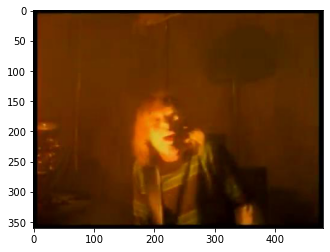

In [11]:
print('Type:', type(frame))
print('Dtype:', frame.dtype)
print('Shape:', frame.shape)
print('Values min/max:', frame.min(), frame.max())
print('Values mean:', frame.mean())

plt.imshow(frame, cmap='gray');

Type: <class 'numpy.ndarray'>
Dtype: float64
Shape: (360, 480)
Values min/max: 0.0 0.7498011764705882
Values mean: 0.18591955018836237


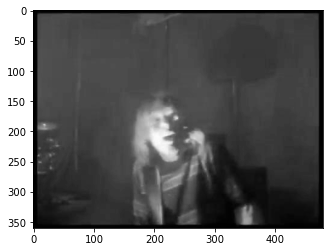

In [12]:

cinza = color.rgb2gray(frame)

print('Type:', type(cinza))
print('Dtype:', cinza.dtype)
print('Shape:', cinza.shape)
print('Values min/max:', cinza.min(), cinza.max())
print('Values mean:', cinza.mean())

plt.imshow(cinza, cmap='gray');

### Data types and image values

In [13]:
from skimage import img_as_float, img_as_ubyte

In [14]:
image_ubyte = img_as_ubyte(frame)
image_float = img_as_float(frame)

In [15]:
print("Type:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("Type:", image_float.dtype, image_float.min(), image_float.max())

Type: uint8 0 255
Type: float64 0.0 1.0


In [16]:
#color channels - RGB

r = image_float[...,0] #same as [:,:, 0]
g = image_float[...,1] #same as [:,:, 1]
b = image_float[...,2] #same as [:,:, 2]
color = frame

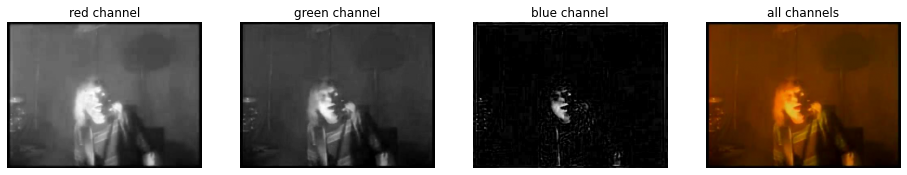

In [17]:
f, axes = plt.subplots(1,4, figsize=(16,5))

for ax in axes:
    ax.axis('off')
    
(ax_r, ax_g, ax_b, ax_color) = axes

ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

ax_color.imshow(np.stack([r,g,b], axis =2))
ax_color.set_title('all channels');

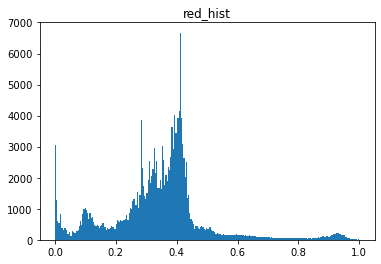

In [18]:
plt.hist(r.ravel(), bins=256)
plt.title("red_hist")
plt.show()

## Threshold

In [19]:
from skimage.filters import try_all_threshold

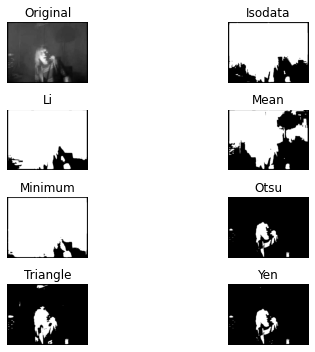

In [20]:
fig, ax = try_all_threshold(cinza, verbose=False)

In [21]:
from skimage.filters import threshold_otsu

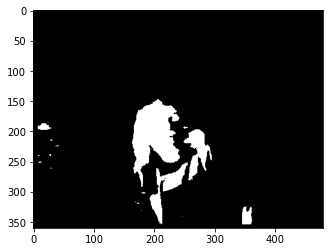

In [22]:
tresh_otsu = threshold_otsu(cinza)
binary = cinza > tresh_otsu
plt.imshow(binary, cmap="gray")

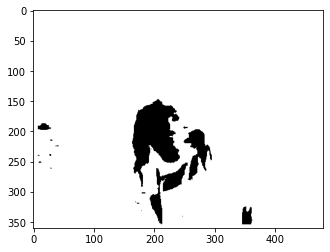

In [23]:
binary2 = cinza <= tresh_otsu
plt.imshow(binary2, cmap="gray")

### Edge detection 

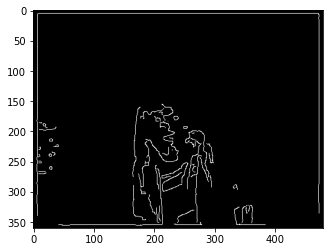

In [24]:
#posso aplicar na imagem com edges tbm
frame_edg_corner = canny(cinza)
plt.imshow(frame_edg_corner, cmap='gray')


In [25]:
#Edge detection SOBEL

from skimage.filters import sobel
import matplotlib.pyplot as plt

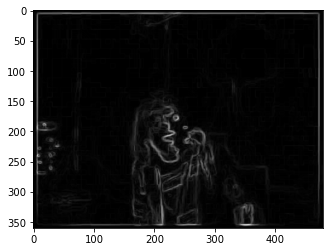

In [26]:
# apllay edge detection - sobel 
frame_edgeDetection = sobel(cinza) 
plt.imshow(frame_edgeDetection, cmap="gray")

### Corners were detection

In [27]:
#Find coordinates of the corners

from skimage.feature import corner_peaks

coords = corner_peaks(corner_harris(cinza), min_distance=5, indices=True) #corner_harris, corner_foerstner(
print('Total of', len(coords), 'corners were detected')
#print(coords)


Total of 13 corners were detected


In [28]:
#testar com o outro modelo
coords_2 = corner_peaks(corner_harris(cinza), min_distance=20)
print('Total of', len(coords_2), 'corners were detected')


Total of 4 corners were detected


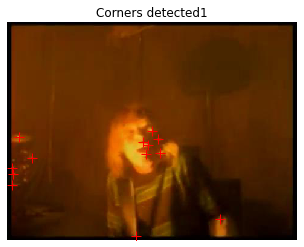

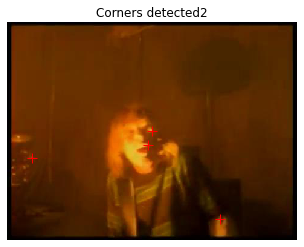

In [29]:
#function to show image with contours

def show_image_with_corners (image, coords, title='Corners detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1], coords[:,0], '+r', markersize =10)
    plt.axis( 'off')
    plt.show()

show_image_with_corners(frame, coords, 'Corners detected1')
show_image_with_corners(frame, coords_2, 'Corners detected2')

### Image colection

In [30]:
from skimage import io

In [31]:
ic = io.ImageCollection(img_list[200:215])
print("Type:", type(ic))
len(ic)

Type: <class 'skimage.io.collection.ImageCollection'>


15

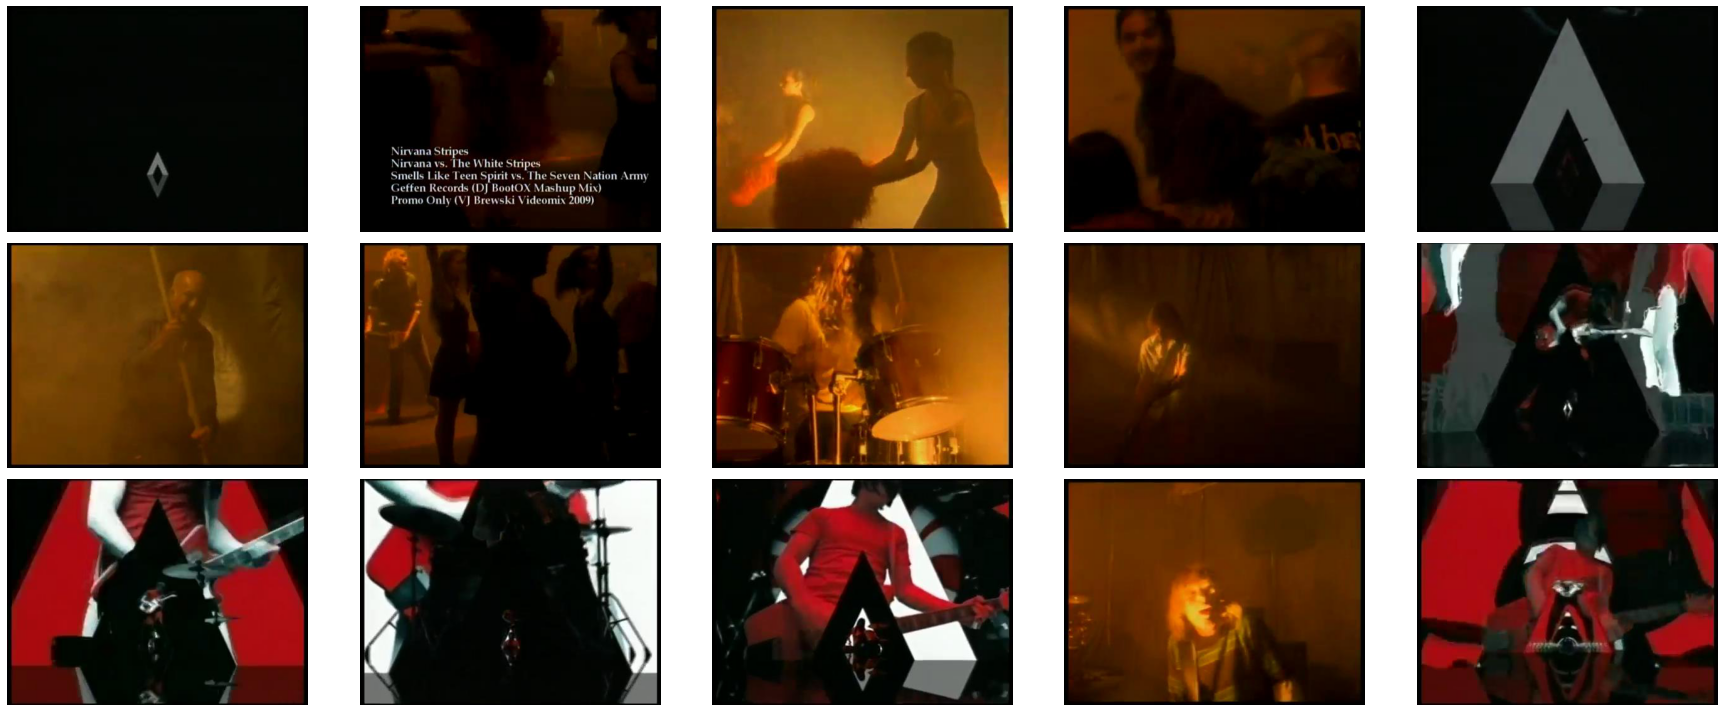

In [32]:
f, axes = plt.subplots(ncols= 5,  nrows=len(ic)//4, figsize=(25, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')
    
for i, image in enumerate(ic):
    axes[i].imshow(image, cmap = 'gray')
    #axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

In [33]:
for i, image in enumerate(ic):
    print("Type:", image.mean())

Type: 3.631917438271605
Type: 16.14899112654321
Type: 69.24402391975309
Type: 18.320713734567903
Type: 19.714471450617285
Type: 46.90279899691358
Type: 13.710891203703703
Type: 59.80312885802469
Type: 21.427168209876545
Type: 38.28294560185185
Type: 44.8825887345679
Type: 64.53514467592592
Type: 44.07417824074074
Type: 42.91385995370371
Type: 37.18914544753086


In [34]:
from skimage import color    

Image 0 - Total of 1 corners were detected


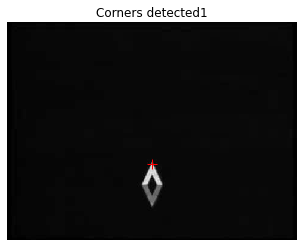

Image 1 - Total of 22 corners were detected


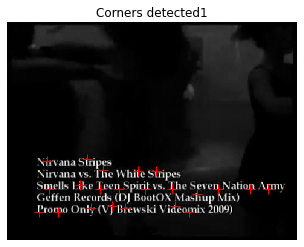

Image 2 - Total of 0 corners were detected


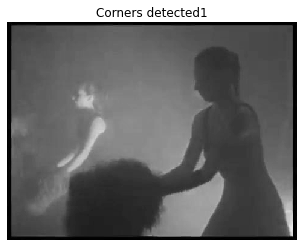

Image 3 - Total of 1 corners were detected


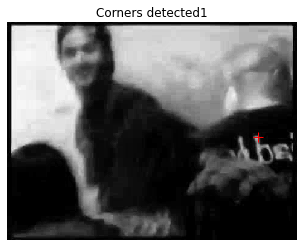

Image 4 - Total of 6 corners were detected


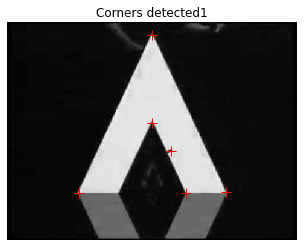

Image 5 - Total of 0 corners were detected


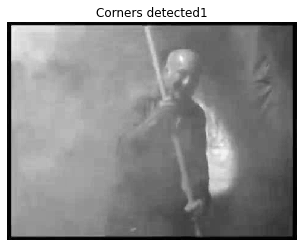

Image 6 - Total of 3 corners were detected


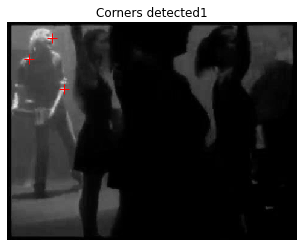

Image 7 - Total of 7 corners were detected


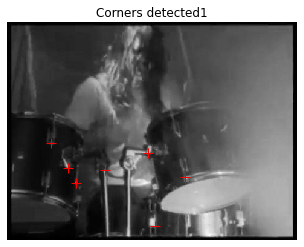

Image 8 - Total of 3 corners were detected


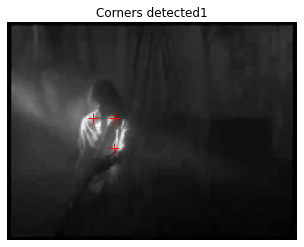

Image 9 - Total of 9 corners were detected


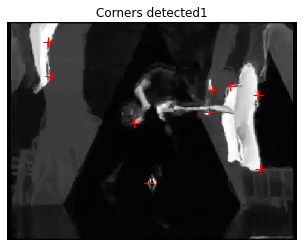

Image 10 - Total of 9 corners were detected


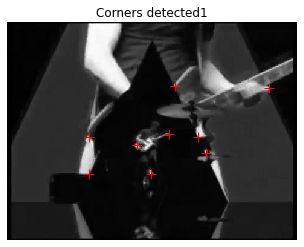

Image 11 - Total of 2 corners were detected


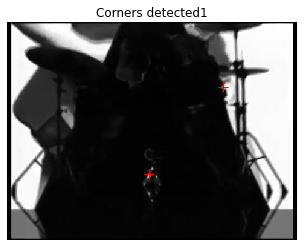

Image 12 - Total of 18 corners were detected


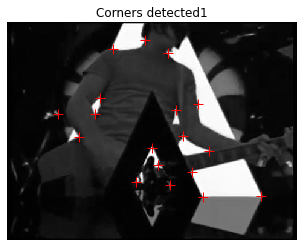

Image 13 - Total of 4 corners were detected


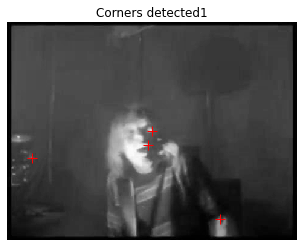

Image 14 - Total of 8 corners were detected


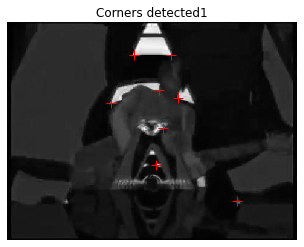

In [35]:
ic = io.ImageCollection(img_list[200:215])

def show_image_with_corners (image, coords, title='Corners detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:,1], coords[:,0], '+r', markersize =10)
    plt.axis( 'off')
    plt.show()
   
for i, image in enumerate(ic):
    image_gray = color.rgb2gray(image)
    coords = corner_peaks(corner_harris(image_gray), min_distance=20, indices=True) #corner_harris, corner_foerstner(
    print("Image", i,"-", 'Total of', len(coords), 'corners were detected')
    show_image_with_corners(image_gray, coords, 'Corners detected1')

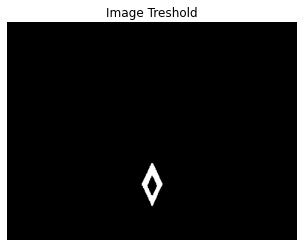

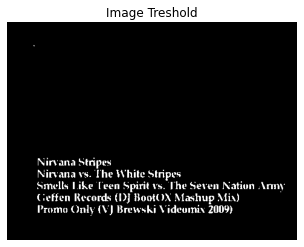

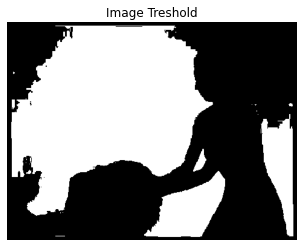

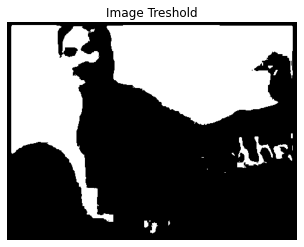

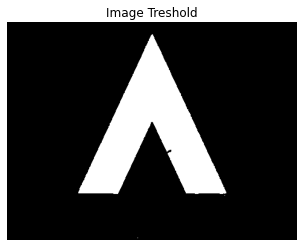

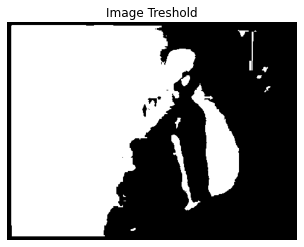

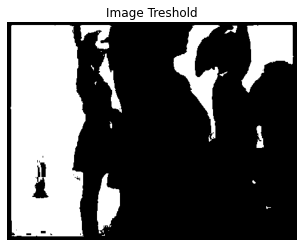

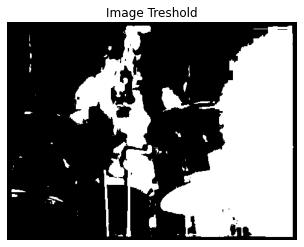

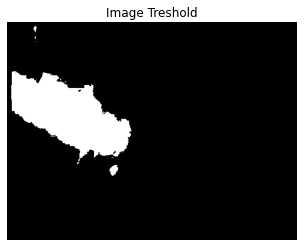

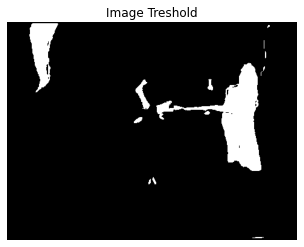

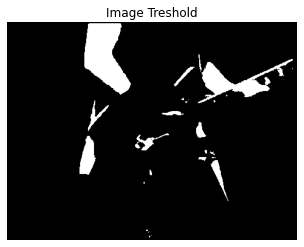

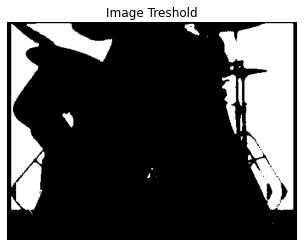

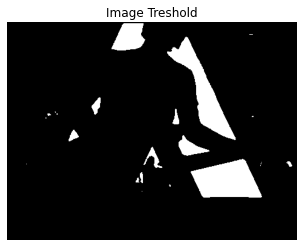

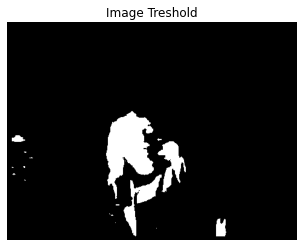

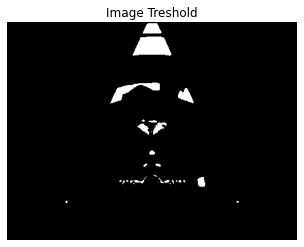

In [36]:
def show_image_treshold(image, title='Image Treshold'):
    plt.imshow(image, cmap='gray')
#     plt.plot(coords[:,1], coords[:,0], '+r', markersize =10)
    plt.title(title)
    plt.axis( 'off')
    plt.show()
    
for i, image in enumerate(ic):
    image_gray = color.rgb2gray(image)
    tresh_otsu = threshold_otsu(image_gray)
    binary = image_gray > tresh_otsu # figura > ou fundo <= 
    show_image_treshold(binary, title='Image Treshold')

In [66]:
# Create an ImageJ gateway with the newest available version of ImageJ.
# !pip3 install pyimagej

In [16]:
# Import ImageIO and NumPy
import imageio
import numpy as np

In [ ]:
img1 = 'StripesNirvana0002.jpg'
print(img1)

In [28]:
img_folders = os.listdir(FRAME_DIR)
print(img_folders)

train_folder = "Train_WhiteStripes_Nirvana_DJBootOXs_Panicversion" #folder to parse

['Montage2 copy.jpg', '.DS_Store', 'ResultsGeral.csv', 'Train_WhiteStripes_Nirvana_DJBootOXs_Panicversion', 'Montage2.jpg', 'MontageS2 copy.jpg', 'Montage1.jpg', 'Train_CarpentersOasis', 'CarpentersOasis', 'MontageS2.jpg', 'B_WhiteStripes_Nirvana_DJBootOXs_Panicversion']


In [34]:
os.chdir('Train_WhiteStripes_Nirvana_DJBootOXs_Panicversion')
os.listdir()

['StripesNirvana000250.jpg',
 'StripesNirvana000244.jpg',
 'StripesNirvana000126.jpg',
 'StripesNirvana000132.jpg',
 'StripesNirvana00026.jpg',
 'StripesNirvana00032.jpg',
 'StripesNirvana0003.jpg',
 'StripesNirvana0002.jpg',
 'StripesNirvana00033.jpg',
 'StripesNirvana00027.jpg',
 'StripesNirvana000133.jpg',
 'StripesNirvana000127.jpg',
 'StripesNirvana000245.jpg',
 'StripesNirvana000251.jpg',
 'StripesNirvana000247.jpg',
 'StripesNirvana000253.jpg',
 'StripesNirvana000119.jpg',
 'StripesNirvana000131.jpg',
 'StripesNirvana000125.jpg',
 'StripesNirvana00019.jpg',
 'StripesNirvana00031.jpg',
 'StripesNirvana00025.jpg',
 'StripesNirvana0001.jpg',
 'StripesNirvana00024.jpg',
 'StripesNirvana00030.jpg',
 'StripesNirvana00018.jpg',
 'StripesNirvana000124.jpg',
 'StripesNirvana000130.jpg',
 'StripesNirvana000118.jpg',
 'StripesNirvana000252.jpg',
 'StripesNirvana000246.jpg',
 'StripesNirvana000242.jpg',
 'StripesNirvana000256.jpg',
 'StripesNirvana000134.jpg',
 'StripesNirvana000120.jpg',
 

In [35]:
os.system(f'magick identify -verbose StripesNirvana0002.jpg >> ping.txt')
with open("ping.txt", "r") as ping:
    text = ping.read()

In [36]:
filename = 'ping.txt'
d = {}

with open(filename)as f:
    for line in f:
        line = line.replace(" ", "")
        print(line)
        (key, val) = line.strip("\n").split(":")
        d[str(key)] = val

print(d)

Image:

Filename:StripesNirvana0002.jpg

Format:JPEG(JointPhotographicExpertsGroupJFIFformat)

Mimetype:image/jpeg

Class:DirectClass

Geometry:480x360+0+0

Units:Undefined

Colorspace:sRGB

Type:Palette

Basetype:Undefined

Endianness:Undefined

Depth:8-bit

Channeldepth:

Red:8-bit

Green:8-bit

Blue:8-bit

Channelstatistics:

Pixels:172800

Red:

min:0(0)

max:181(0.709804)

mean:2.77373(0.0108774)

median:0(0)

standarddeviation:6.81693(0.026733)

kurtosis:379.218

skewness:18.4345

entropy:0.292594

Green:

min:0(0)

max:186(0.729412)

mean:5.50788(0.0215995)

median:1(0.00392157)

standarddeviation:6.94054(0.0272178)

kurtosis:375.929

skewness:18.3775

entropy:0.268142

Blue:

min:0(0)

max:182(0.713725)

mean:2.94174(0.0115362)

median:0(0)

standarddeviation:6.87763(0.0269711)

kurtosis:374.539

skewness:18.2912

entropy:0.308049

Imagestatistics:

Overall:

min:0(0)

max:186(0.729412)

mean:3.74112(0.014671)

median:0.333333(0.00130719)

standarddeviation:6.87836(0.026974)

k

ValueError: too many values to unpack (expected 2)

In [37]:
# # creating json file 
# # the JSON file is named as test1 

out_file = open("test1.json", "w") 

json.dump(d, out_file, indent = 1, sort_keys = False) 
out_file.close() 



os.getcwd()

with open("test1.json", "r") as ping:
    tt = json.load(ping)

tt.keys()

# for t in tt:
print(tt['Filename']),
print("min:", tt['min'][0:1])
print("max:", tt['max'][0:3])
print('mean:', tt['mean'][0:7])
print('median:', tt['median'][0:7])
print('standarddeviation:', tt['standarddeviation'][0:7])
print('kurtosis:', tt['kurtosis'])
print('skewness:', tt['skewness'])
print('entropy:', tt['entropy'])
print('Chromaticity:', f'\n', 'redprimary:',  tt['redprimary'],
      'greenprimary:', tt['greenprimary'],
      'blueprimary:', tt['blueprimary'],
      'whitepoint:', tt['whitepoint'] )
# print('Convexhull:', tt['Convexhull'])
# print('Minimumboundingbox:', tt['Minimumboundingbox'])
# print('Convexhull:', tt['Convexhull'])



# Criar Data Frame
## a partir do documento json - 'merge_file2021.json', criar Data Frame
### key value pairs / json: 'Filename','min', 'max', 'mean', 'median', 'standarddeviation', 'kurtosis', 'skewness', 'entropy'
df_im_data = []

for d in tt:
    Filename = tt['Filename']
    min_ = tt['min'][0:1]
    max_ = tt['max'][0:3]
    mean_ = tt['mean'][0:7]
    median_ = tt['median'][0:7]
    standarddeviation = tt['standarddeviation'][0:7]
    kurtosis = tt['kurtosis']
    skewness = tt['skewness']
    entropy = tt['entropy']
        
    df_im_data.append((Filename, min_, max_, mean_, median_, standarddeviation, kurtosis, skewness, entropy))
        
df_im_data = pd.DataFrame(df_im_data, columns=['Filename','min', 'max', 'mean', 'median', 'standarddeviation', 'kurtosis', 'skewness', 'entropy'])

df_im_data.to_csv(f"im_data_test.csv")

df = pd.read_csv("im_data_test.csv")

df.head(1)

StripesNirvana0002.jpg
min: 0
max: 186
mean: 3.74112
median: 0.33333
standarddeviation: 6.87836
kurtosis: 353.122
skewness: 17.5043
entropy: 0.289595
Chromaticity: 
 redprimary: (0.64,0.33) greenprimary: (0.3,0.6) blueprimary: (0.15,0.06) whitepoint: (0.3127,0.329)


,Unnamed: 0,Filename,min,max,mean,median,standarddeviation,kurtosis,skewness,entropy
0,0,StripesNirvana0002.jpg,0,186,3.74112,0.33333,6.87836,353.122,17.5043,0.289595
